# Decision Tree Model

In [16]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [17]:
# we want to read in the csv file provided, noticed the path down in the read_csv() can be changed as we like.
df = pd.read_csv('iris-data-clean.csv')
df # show the first five rows

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
140,6.7,3.0,5.2,2.3,Virginica
141,6.3,2.5,5.0,1.9,Virginica
142,6.5,3.0,5.2,2.0,Virginica
143,6.2,3.4,5.4,2.3,Virginica


In [18]:
df["class"] = df["class"].map({"Setosa": 0,
             "Versicolor": 1,
             "Virginica": 2
             })
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Preprocess the data



In [19]:
# extract data and target from our dataframe
data = df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']] # independent variables
target = df['class']  # dependent variable: y
#data.head()
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
140    2
141    2
142    2
143    2
144    2
Name: class, Length: 145, dtype: int64

In [20]:
target

0      0
1      0
2      0
3      0
4      0
      ..
140    2
141    2
142    2
143    2
144    2
Name: class, Length: 145, dtype: int64

### Build the Decision Tree Model

In [21]:
# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [22]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# The features involves continuous variables, which make yield an infinite possible number of splits
# Specify the random state so that the same decision tree will be generated for every run
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(x_train, y_train) # train our model

DecisionTreeClassifier(random_state=42)

### Evaluate the model

In [23]:
y_pred = dt.predict(x_test) # let the model predict the test data

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8918918918918919

In [25]:
print(y_pred) # what the model predict entertainment labels
print(y_test) # true labels


[1 2 0 0 0 2 2 2 1 0 0 1 1 2 1 0 2 1 2 1 1 2 0 1 0 1 1 1 2 0 0 0 2 2 0 0 2]
69     1
140    2
27     0
19     0
42     0
117    2
126    2
108    2
84     1
18     0
12     0
55     1
128    2
78     1
73     1
36     0
112    2
133    2
100    2
101    2
94     1
136    2
11     0
66     1
31     0
45     1
51     1
76     1
111    2
9      0
4      0
26     0
120    2
125    2
16     0
10     0
118    2
Name: class, dtype: int64


Compare the predicted labels and true labels. The accuracy score formula can be seen as

$$ accuracy\_score = \frac{number\_of\_matches}{number\_of\_samples} $$



### Visualize the Decision Tree



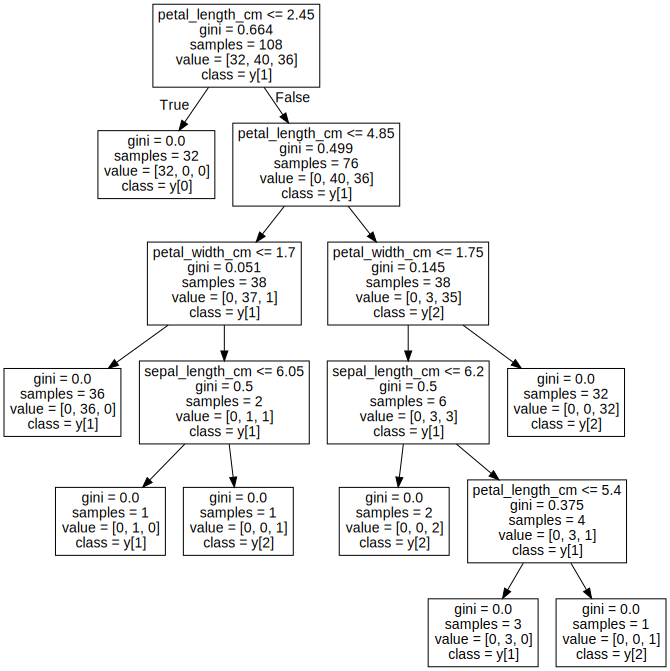

In [26]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

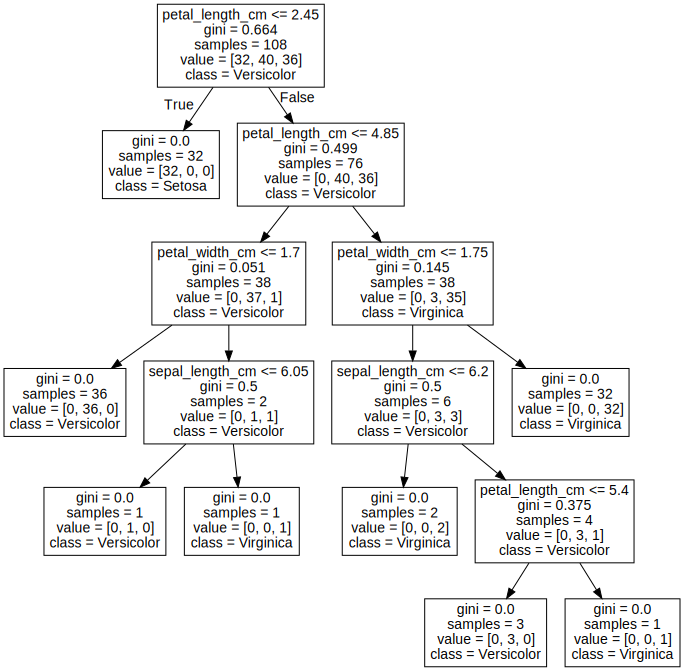

In [27]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=["Setosa",  "Versicolor", "Virginica"], feature_names= x_train.columns)) # display the tree, with no output file

2) Set the level of depth to 3.  Send some data for prediction.

In [28]:

dt = DecisionTreeClassifier(max_depth = 3,random_state=42) 
dt.fit(x_train, y_train) # train our model

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
y_pred = dt.predict(x_test) 
print(y_pred)

[1 2 0 0 0 2 2 2 1 0 0 1 1 1 1 0 2 1 2 1 1 2 0 1 0 1 1 1 2 0 0 0 2 2 0 0 2]


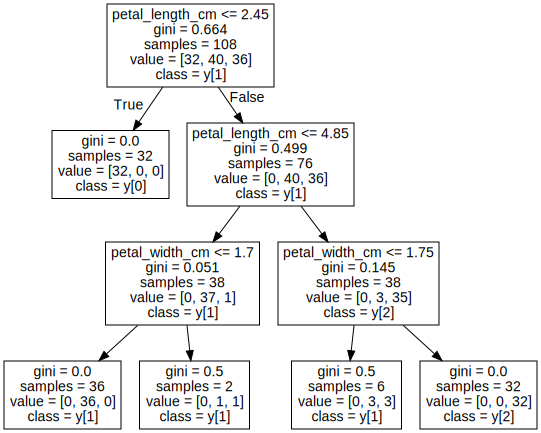

In [30]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

3) Set the level of depth to 1.  Send some data for prediction.  What is the outcome?  Describe your reason.

In [35]:

dt = DecisionTreeClassifier(max_depth = 1,random_state=42) 
dt.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=1, random_state=42)

In [36]:
# level of depth = 1 results in an underfit model
y_pred = dt.predict(x_test) 
print(y_pred)

[1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1]


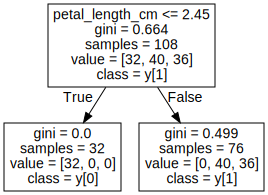

In [37]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file